In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

## 1. Read Data

In [2]:
# read the data
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')


## 2. Preprocessing

In [3]:
# split the data into developing and testing sets
X_dev,X_test,y_dev,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

# scale the data
scaler = StandardScaler()
X_dev = scaler.fit_transform(X_dev)
X_test = scaler.transform(X_test)

X_train,X_val,y_train,y_val = train_test_split(X_dev,y_dev,test_size=0.2,random_state=42,stratify=y_dev)

## 3. Logistic Regression

### 3.1 Simple Logistic Regression

In [4]:
model_linear = LogisticRegression(penalty='none',n_jobs=8)
model_linear.fit(X_dev,y_dev)

LogisticRegression(n_jobs=8, penalty='none')

In [5]:
y_pred = model_linear.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1: ', f1_score(y_test,y_pred))

Accuracy:  0.9736842105263158
Precision:  0.975609756097561
Recall:  0.9523809523809523
F1:  0.963855421686747


### 3.2 Logistic Regression with L-1 Regularization

#### 3.2.1 Grid Search

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


para = {"C":np.logspace(-2,2,20)}
model = LogisticRegression(penalty='l1', solver='liblinear',max_iter=200)
clf = GridSearchCV(model,para,cv=10,n_jobs=8,scoring='f1')
clf.fit(X_dev,y_dev)

print("Best Score: ", clf.best_score_)
print("Best Parameter", clf.best_params_)


/Users/yichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.p

Best Score:  0.9760732323232324
Best Parameter {'C': 0.29763514416313175}


/Users/yichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### 3.2.2 Testing

In [19]:
# Lasso Logistic Regression
model_lasso = LogisticRegression(penalty='l1',C=clf.best_params_['C'],solver='liblinear')
model_lasso.fit(X_dev,y_dev)

LogisticRegression(C=0.29763514416313175, penalty='l1', solver='liblinear')

In [20]:
y_pred = model_lasso.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1: ', f1_score(y_test,y_pred))

Accuracy:  0.956140350877193
Precision:  0.9512195121951219
Recall:  0.9285714285714286
F1:  0.9397590361445782


### 3.3 Logistic Regression with L-2 Regularization

### 3.3.1 Grid Search

In [22]:
para = {"C":np.logspace(-2,2,20)}
model = LogisticRegression(penalty='l2', solver='liblinear',max_iter=200)
clf = GridSearchCV(model,para,cv=10,n_jobs=8,scoring='f1')
clf.fit(X_dev,y_dev)

print("Best Score: ", clf.best_score_)
print("Best Parameter", clf.best_params_)

Best Score:  0.9757413419913419
Best Parameter {'C': 0.18329807108324356}


### 3.3.2 Testing

In [23]:
# Ridge Logistic Regression
model_ridge = LogisticRegression(penalty='l2',C=clf.best_params_['C'],solver='liblinear')
model_ridge.fit(X_dev,y_dev)


LogisticRegression(C=0.18329807108324356, solver='liblinear')

In [24]:
y_pred = model_ridge.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1: ', f1_score(y_test,y_pred))

Accuracy:  0.9649122807017544
Precision:  0.9523809523809523
Recall:  0.9523809523809523
F1:  0.9523809523809523


### 3.4 Logistic Regression with both Regularization

### 3.4.1 Grid Search

In [26]:
para = {"C":np.logspace(-2,2,20),"l1_ratio":np.linspace(0,1,20)}
model = LogisticRegression(penalty='elasticnet', solver='saga',max_iter=200)
clf = GridSearchCV(model,para,cv=10,n_jobs=8,scoring='f1')
clf.fit(X_dev,y_dev)

print("Best Score: ", clf.best_score_)
print("Best Parameter", clf.best_params_)

/Users/yichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yichen/opt/anaconda3/lib/python3.8/sit

Best Score:  0.9760732323232324
Best Parameter {'C': 1.2742749857031335, 'l1_ratio': 0.6842105263157894}


/Users/yichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yichen/opt/anaconda3/lib/python3.8/sit

### 3.4.2 Testing

In [27]:
# Elastic Net Logistic Regression
model_net = LogisticRegression(penalty='elasticnet',C=clf.best_params_['C'],solver='saga',l1_ratio=clf.best_params_['l1_ratio'])
model_net.fit(X_dev,y_dev)

/Users/yichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1.2742749857031335, l1_ratio=0.6842105263157894,
                   penalty='elasticnet', solver='saga')

In [28]:
y_pred = model_net.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1: ', f1_score(y_test,y_pred))

Accuracy:  0.9649122807017544
Precision:  0.9523809523809523
Recall:  0.9523809523809523
F1:  0.9523809523809523


## 4. Evaluation

### 4.1 Confusion Matrix

Metrix for Simple Linear Regression: 
Accuracy:  0.9736842105263158
Precision:  0.975609756097561
Recall:  0.9523809523809523
F1:  0.963855421686747


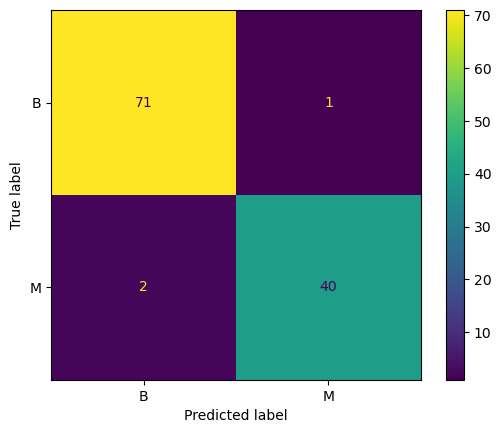

In [50]:

y_pred_1 = model_linear.predict(X_test)
print('Metrix for Simple Linear Regression: ')
print('Accuracy: ', accuracy_score(y_test,y_pred_1))
print('Precision: ', precision_score(y_test,y_pred_1))
print('Recall: ', recall_score(y_test,y_pred_1))
print('F1: ', f1_score(y_test,y_pred_1))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_1.round(),display_labels=['B','M'])

Metrix for Lasso Regression: 
Accuracy:  0.956140350877193
Precision:  0.9512195121951219
Recall:  0.9285714285714286
F1:  0.9397590361445782


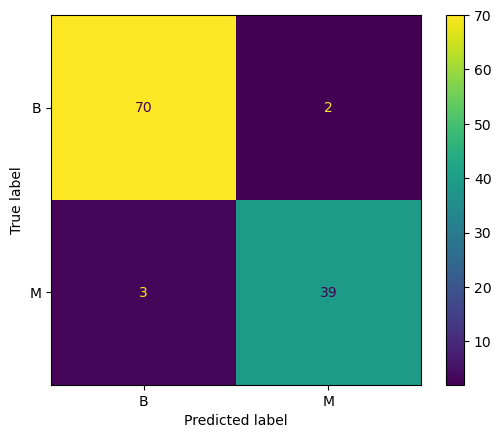

In [49]:

y_pred_2 = model_lasso.predict(X_test)
print('Metrix for Lasso Regression: ')
print('Accuracy: ', accuracy_score(y_test,y_pred_2))
print('Precision: ', precision_score(y_test,y_pred_2))
print('Recall: ', recall_score(y_test,y_pred_2))
print('F1: ', f1_score(y_test,y_pred_2))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_2.round(),display_labels=['B','M'])

Metrix for Ridge Regression: 
Accuracy:  0.9649122807017544
Precision:  0.9523809523809523
Recall:  0.9523809523809523
F1:  0.9523809523809523


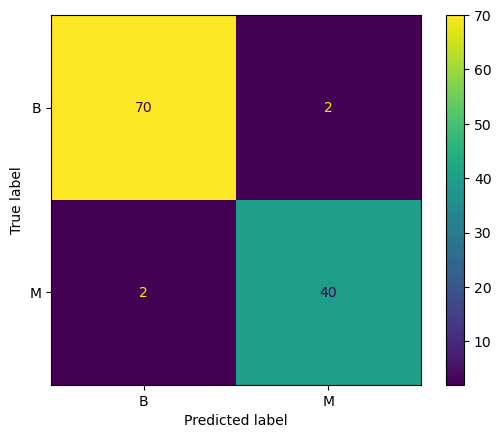

In [55]:

y_pred_3 = model_ridge.predict(X_test)
print('Metrix for Ridge Regression: ')
print('Accuracy: ', accuracy_score(y_test,y_pred_3))
print('Precision: ', precision_score(y_test,y_pred_3))
print('Recall: ', recall_score(y_test,y_pred_3))
print('F1: ', f1_score(y_test,y_pred_3))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_3.round(),display_labels=['B','M'])

Metrix for Elastic Net Regression: 
Accuracy:  0.9649122807017544
Precision:  0.9523809523809523
Recall:  0.9523809523809523
F1:  0.9523809523809523


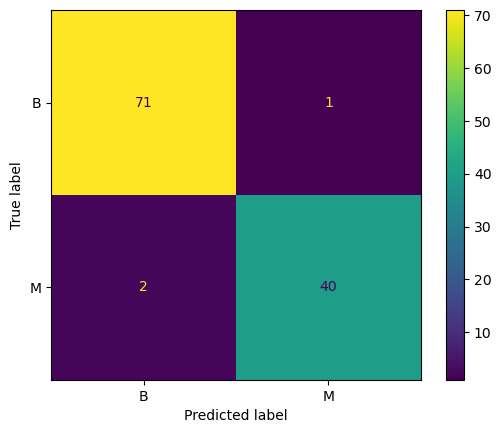

In [52]:

y_pred_4 = model_net.predict(X_test)
print('Metrix for Elastic Net Regression: ')
print('Accuracy: ', accuracy_score(y_test,y_pred_4))
print('Precision: ', precision_score(y_test,y_pred_4))
print('Recall: ', recall_score(y_test,y_pred_4))
print('F1: ', f1_score(y_test,y_pred_4))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_1.round(),display_labels=['B','M'])

### 4.3 ROC Curve

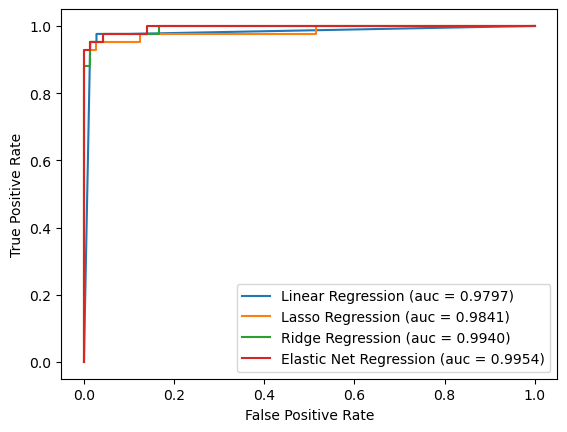

<Figure size 1500x2000 with 0 Axes>

In [60]:
plt.figure(0).clf()

y_pred = model_linear.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='Linear Regression (auc = %0.4f)' % auc)

y_pred = model_lasso.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='Lasso Regression (auc = %0.4f)' % auc)

y_pred = model_ridge.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='Ridge Regression (auc = %0.4f)' % auc)

y_pred = model_net.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='Elastic Net Regression (auc = %0.4f)' % auc)

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.figure(figsize=(15, 20))
plt.show()


### 4.4 Feature Importance

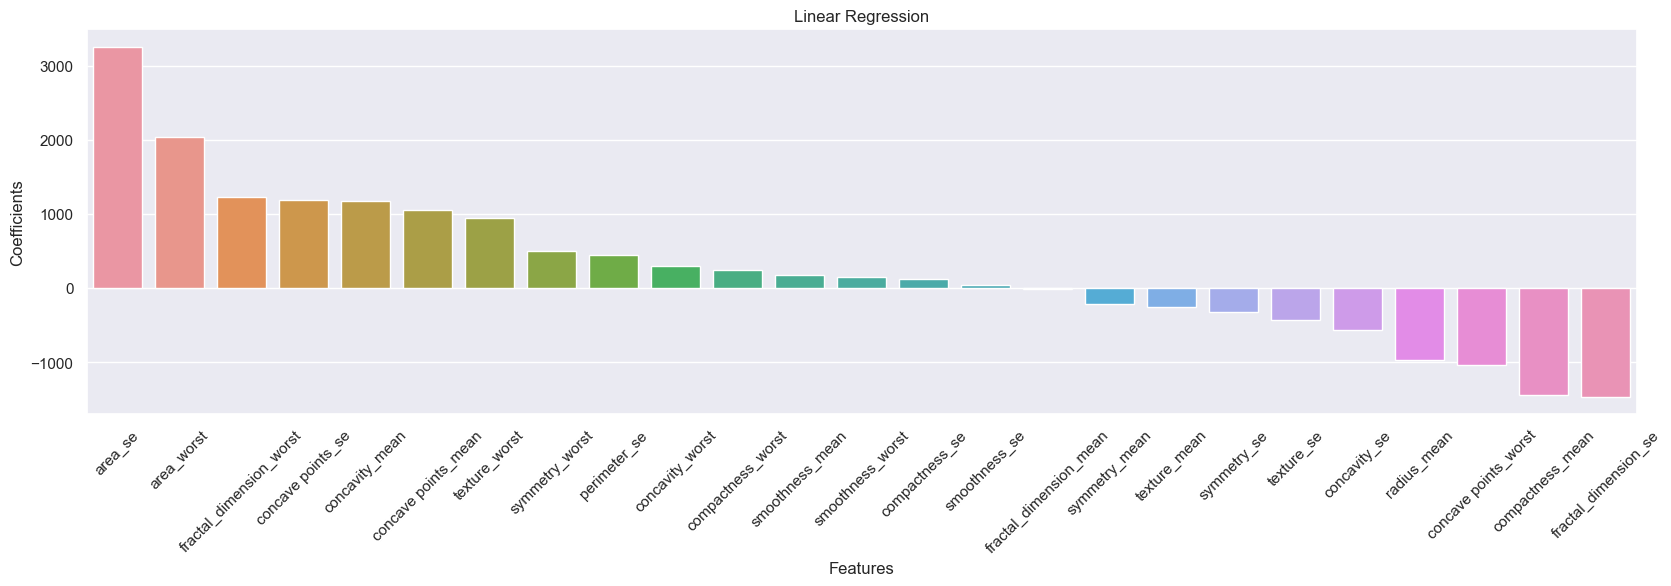

In [83]:
weight = pd.DataFrame(model_linear.coef_[0].T,index=X.columns,columns=['Weight'])

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=weight, x=weight.index, y = 'Weight',order=weight.sort_values('Weight', ascending=False).index).set_title('Simple Regression')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

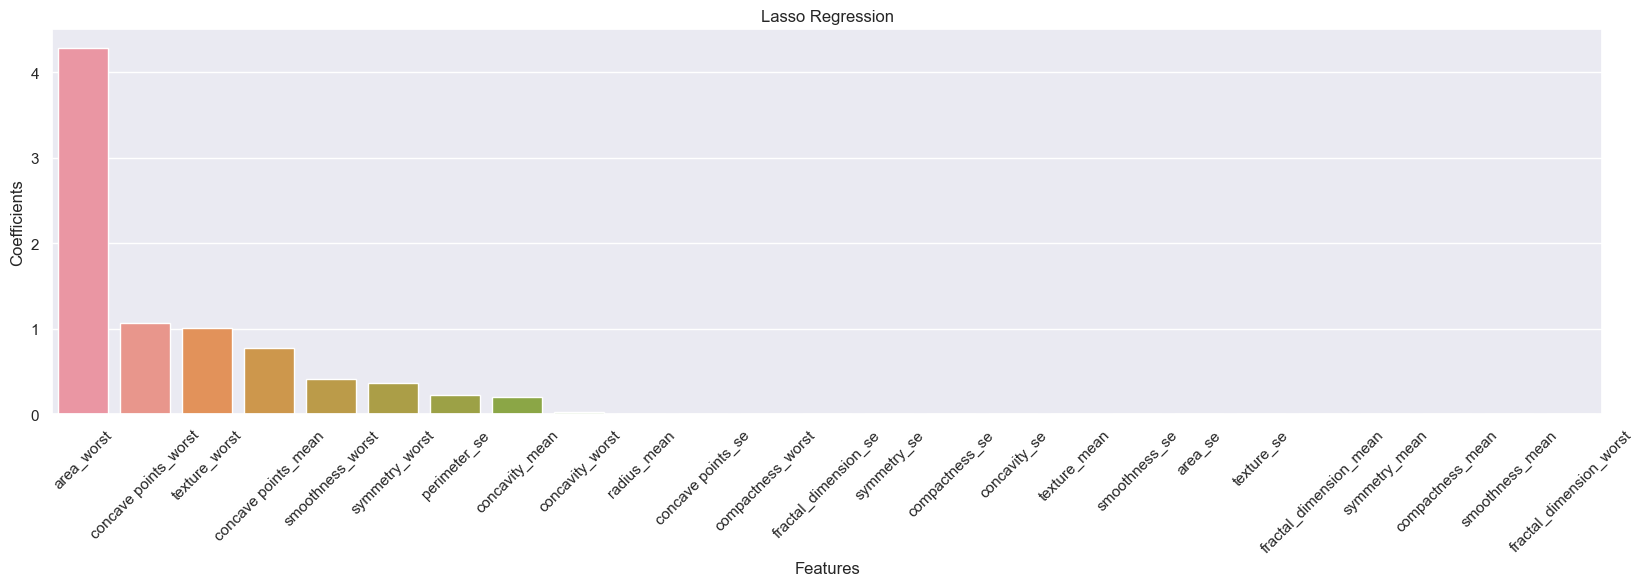

In [85]:
weight = pd.DataFrame(model_lasso.coef_[0].T,index=X.columns,columns=['Weight'])

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=weight, x=weight.index, y = 'Weight',order=weight.sort_values('Weight', ascending=False).index).set_title('Lasso Regression')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

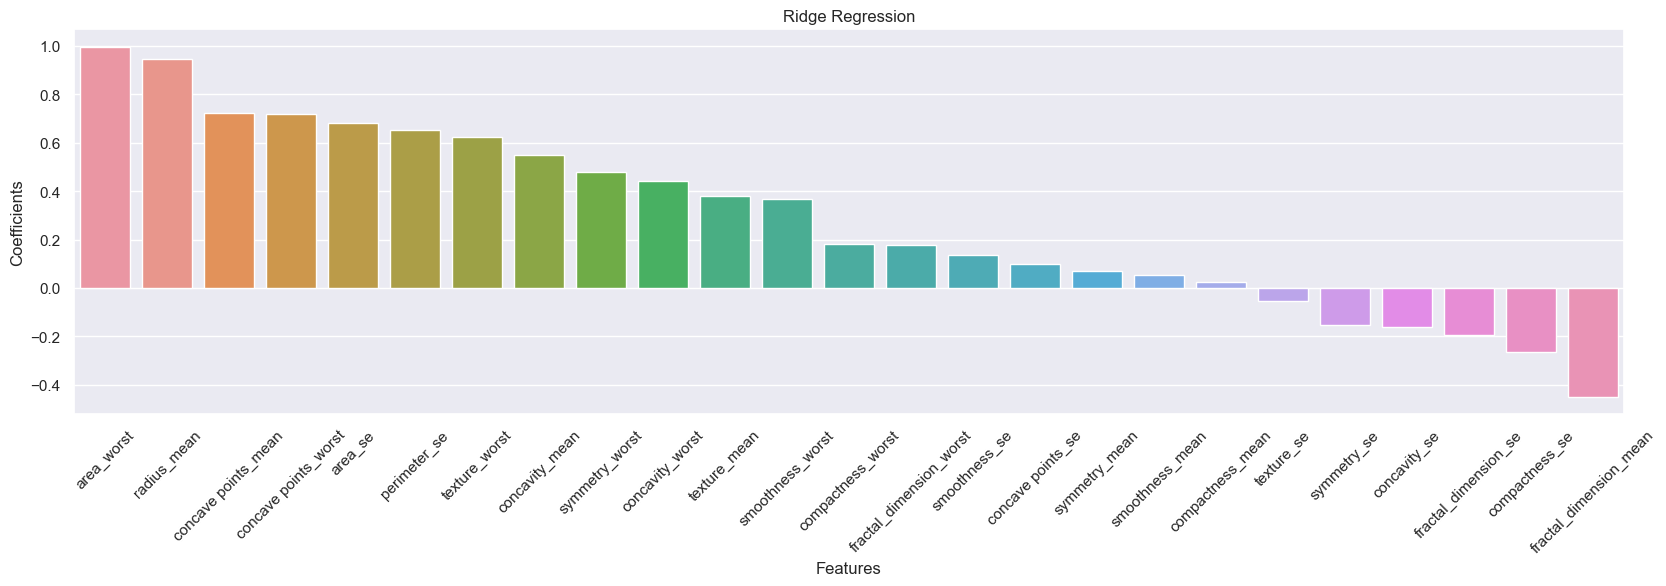

In [86]:
weight = pd.DataFrame(model_ridge.coef_[0].T,index=X.columns,columns=['Weight'])

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=weight, x=weight.index, y = 'Weight',order=weight.sort_values('Weight', ascending=False).index).set_title('Ridge Regression')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

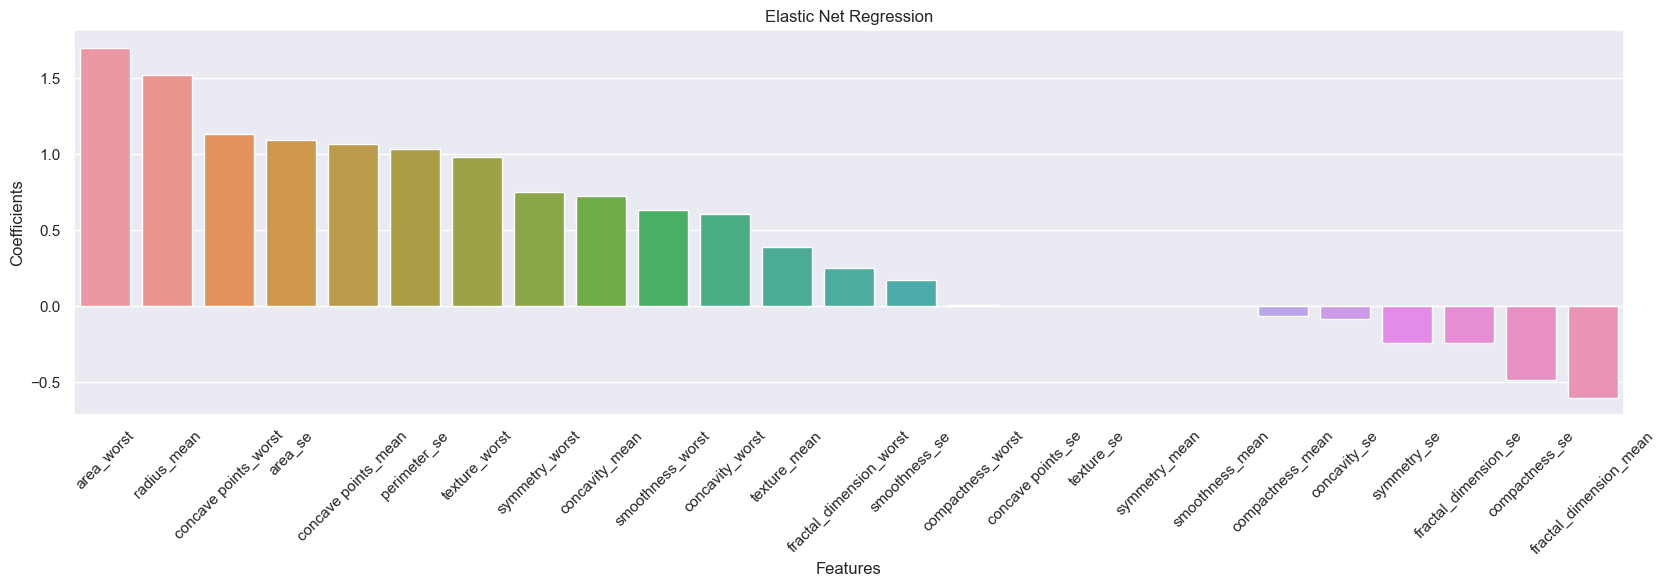

In [87]:
weight = pd.DataFrame(model_net.coef_[0].T,index=X.columns,columns=['Weight'])

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=weight, x=weight.index, y = 'Weight',order=weight.sort_values('Weight', ascending=False).index).set_title('Elastic Net Regression')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()